<a href="https://colab.research.google.com/github/andressatheotonio/LatinAmerica_SuicideRates/blob/master/LatinAmerica_SuicideRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# América Latina

A América Latina é um dos continentes com menores números nos índices de morte por suicídio. Porém, isso não deve excluir o suicídio das políticas de prevenção, já que o número vem se tornando cada ano mais significante nos países latino americanos. 

Relacionando os dados utilizados nesse projeto e matérias veiculadas em grandes jornais e revistas, podemos afirmar que o gênero mais afetado pelo comportamento suicida é o masculino. Fazendo um recorte desse público, confirmamos que homens jovens (15-29 anos) e idosos são os mais expostos a esse risco. Esse dado pode ser relacionado a como os homens reagem a crises de diversos tipos em suas vidas, já que muitos deles sofrem com a vergonha de mostrar fragilidades e têm um menor interesse em buscar auxílio profissional.

Além disso, é de extrema importância lembrar que o suicídio não é um "fenômeno" que pode ser completamente analisado por dados. Isso ocorre porque aspectos culturais e trajetórias pessoais são de grande influência no comportamento suicida, muitas vezes, tão ou mais determinantes que a qualidade de vida do país em que vive, o acesso à educação, a liberdade social/econômica e o uso de drogas lícitas e ilícitas.

_Lembre-se: Você anda tendo pensamentos com tendências suicidas ou está deprimido e ansioso? Ligue para o Centro de Valorização da Vida (CVV). As ligações são gratuitas e o contato deve ser feito pelo número 188._


## Índices Utilizados

*  IDH (Índice de Desenvolvimento Humano, 0: menor índice, 1000: maior índice)
*  Taxa de Suícidios, Masculino (por 100.000 hab)
*  Taxa de Suícidios, Feminino (por 100.000 hab)
*  Índice de Desigualdade de Gênero (0: mais igual, 1000: mais desigual)
* Índice de Renda (Paridade do Poder de Compra, per capita, 0: menor índice, 1000: maior índice)
* Taxa de Desemprego (% da PEA - População Economicamente Ativa)
* Índice de Educação (0: pior sistema educacional, 1000: melhor sistema educacional)
* Índice de Liberdade (Direitos Políticos e Liberdade Civil - 1: Livre, 7: Não Livre)
* Taxa de Divórcios (por 100.000 hab)
* Taxa de Transtornos e Doenças causadas pelo consumo de drogas (por 100.000 hab)

## Fontes dos Dados Utilizados

* UNDP (United Nations Development Programme) - http://hdr.undp.org/
* Freedom House - https://freedomhouse.org/
* Our World In Data - https://ourworldindata.org/
* Espacio Investiga: Fundación Rafael Del Pino - https://espacioinvestiga.org/


### Pré processo e análise dos dados


In [0]:
#Importando bibliotecas

import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
#Importando arquivos e exibindo dataframe

latinamerica = pd.read_csv("latinamerica2015.csv", sep=",")

latinamerica = latinamerica.dropna()

latinamerica

,Countries,HDI,Male Suicides,Female Suicides,Gender Inequality,Income Index,Unemployment Index,Education Index,Freedom Index,Divorce Rate,Drugs Rate
0,Chile,840,15.3,3.3,325.0,814,6.5,797,1.0,0.7,213.55
2,Bahamas,807,2.9,0.4,364.0,849,12.0,726,1.0,1.8,213.90
3,Uruguay,800,25.2,6.3,283.0,795,7.5,731,1.0,0.9,201.97
4,Barbados,797,0.5,0.1,294.0,761,11.4,777,1.0,1.5,179.49
5,Costa Rica,788,12.6,2.0,303.0,747,9.3,713,1.0,2.5,215.73
6,Panama,781,10.1,1.1,465.0,786,4.5,681,2.0,1.0,193.39
8,Venezuela (Bolivarian Republic of),775,5.4,1.1,467.0,758,6.8,733,5.0,1.2,204.93
9,Cuba,772,17.0,4.2,307.0,653,2.4,768,6.5,2.9,174.25
10,Mexico,767,8.1,2.1,348.0,772,4.3,666,3.0,0.9,241.39
11,Brazil,757,9.6,2.7,413.0,750,8.4,680,2.0,1.4,267.94


In [0]:
#Estatístics Descritivas do Dataframe

latinamerica.describe().round(2)

,HDI,Male Suicides,Female Suicides,Gender Inequality,Income Index,Unemployment Index,Education Index,Freedom Index,Divorce Rate,Drugs Rate
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00
mean,725.19,14.22,4.07,408.69,698.62,7.62,657.73,2.65,1.22,213.50
std,73.92,10.81,4.11,76.32,90.05,4.84,88.67,1.41,0.60,32.09
min,493.00,0.50,0.10,283.00,424.00,2.40,426.00,1.00,0.60,161.32
25%,686.25,8.38,1.70,352.00,653.00,4.35,633.25,1.62,0.90,194.72
50%,742.50,12.10,2.65,404.00,716.00,6.65,675.50,2.50,0.90,210.17
75%,774.25,16.73,4.35,465.00,757.00,9.82,710.75,3.38,1.37,235.74
max,840.00,46.00,15.50,593.00,849.00,24.10,797.00,6.50,2.90,287.41


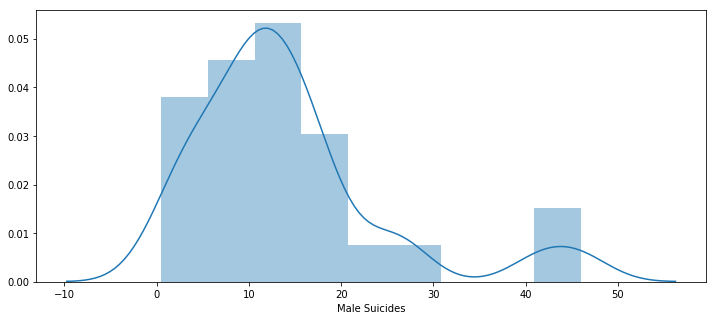

In [0]:
#Distribuição de frequência da variável dependente (Suicídios M)

smx = sns.distplot(latinamerica['Male Suicides'])
smx.figure.set_size_inches(12,5)

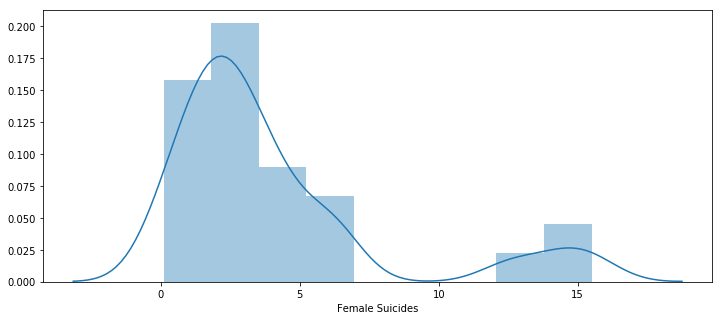

In [0]:
#Distribuição de frequência da variável dependente (Suicídios F)

sfx = sns.distplot(latinamerica['Female Suicides'])
sfx.figure.set_size_inches(12,5)

### Visualizando Relações

In [0]:
#Matriz de Correlação

latinamerica.corr().round(2)

,HDI,Male Suicides,Female Suicides,Gender Inequality,Income Index,Unemployment Index,Education Index,Freedom Index,Divorce Rate,Drugs Rate
HDI,1.00,-0.24,-0.35,-0.79,0.93,-0.03,0.93,-0.48,0.29,-0.06
Male Suicides,-0.24,1.00,0.92,0.20,-0.15,-0.01,-0.16,-0.03,-0.20,0.05
Female Suicides,-0.35,0.92,1.00,0.33,-0.27,-0.11,-0.23,0.09,-0.22,0.19
Gender Inequality,-0.79,0.20,0.33,1.00,-0.63,-0.08,-0.77,0.45,-0.26,0.13
Income Index,0.93,-0.15,-0.27,-0.63,1.00,-0.00,0.78,-0.59,0.13,0.09
Unemployment Index,-0.03,-0.01,-0.11,-0.08,-0.00,1.00,0.04,-0.38,-0.00,-0.16
Education Index,0.93,-0.16,-0.23,-0.77,0.78,0.04,1.00,-0.38,0.32,-0.17
Freedom Index,-0.48,-0.03,0.09,0.45,-0.59,-0.38,-0.38,1.00,0.16,-0.04
Divorce Rate,0.29,-0.20,-0.22,-0.26,0.13,-0.00,0.32,0.16,1.00,-0.11
Drugs Rate,-0.06,0.05,0.19,0.13,0.09,-0.16,-0.17,-0.04,-0.11,1.00


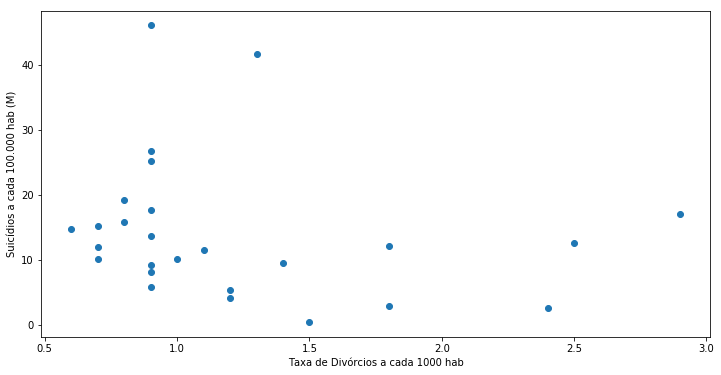

In [0]:
#Visualizando as Relações [Divórcios e Suicídios (M)]

plot.figure(figsize=(12,6))
plot.plot(latinamerica['Divorce Rate'],latinamerica['Male Suicides'], 'o')
plot.xlabel('Taxa de Divórcios a cada 1000 hab')
plot.ylabel('Suicídios a cada 100.000 hab (M)')
plot.show()

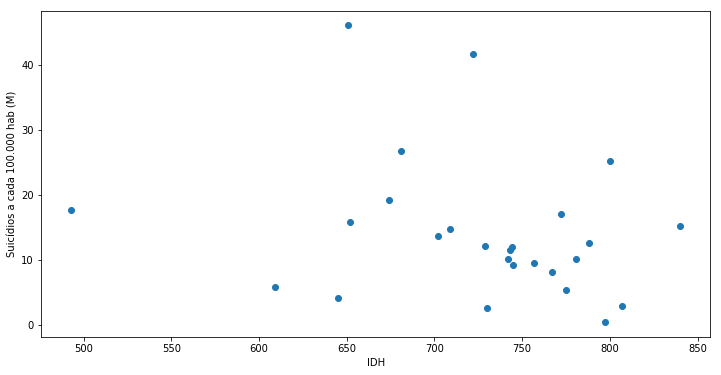

In [0]:
#Visualizando as Relações [IDH e Suicídios (M)]

plot.figure(figsize=(12,6))
plot.plot(latinamerica['HDI'],latinamerica['Male Suicides'], 'o')
plot.xlabel('IDH')
plot.ylabel('Suicídios a cada 100.000 hab (M)')
plot.show()

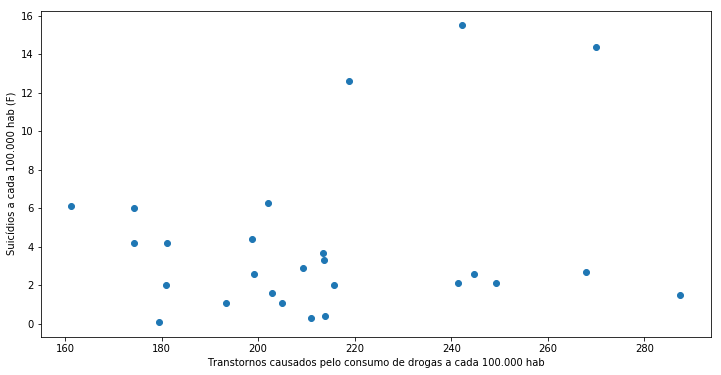

In [0]:
#Visualizando as Relações [Transtornos causados pelo consumo de drogas e Suicídios (F)]

plot.figure(figsize=(12,6))
plot.plot(latinamerica['Drugs Rate'],latinamerica['Female Suicides'], 'o')
plot.xlabel('Transtornos causados pelo consumo de drogas a cada 100.000 hab')
plot.ylabel('Suicídios a cada 100.000 hab (F)')
plot.show()

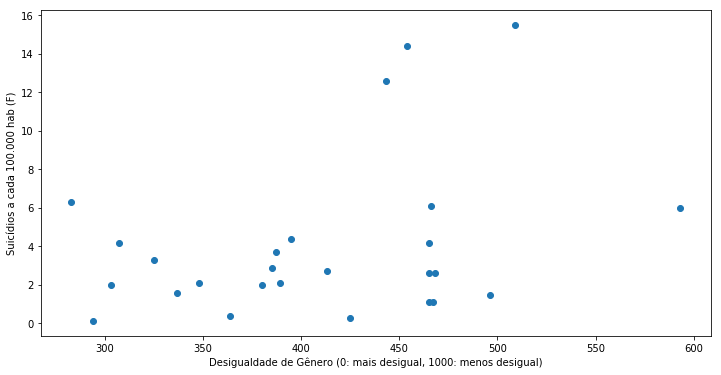

In [0]:
#Visualizando as Relações [Desigualdade de Gênero e Suicídios (F)]

plot.figure(figsize=(12,6))
plot.plot(latinamerica['Gender Inequality'],latinamerica['Female Suicides'], 'o')
plot.xlabel('Desigualdade de Gênero (0: mais desigual, 1000: menos desigual)')
plot.ylabel('Suicídios a cada 100.000 hab (F)')
plot.show()

### Regressão

In [0]:
#Relacionando duas variáveis

def coeficientes(x,y):
  mat = x.shape[0]
  
  soma_x = np.sum(x)
  soma_x2 = np.sum(x**2)
  
  soma_y = np.sum(y)
  soma_y2 = np.sum(y**2)
  
  soma_xy = np.sum(x*y)
  
  return np.linalg.solve([[mat,soma_x],[soma_x,soma_x2]],[soma_y,soma_xy])

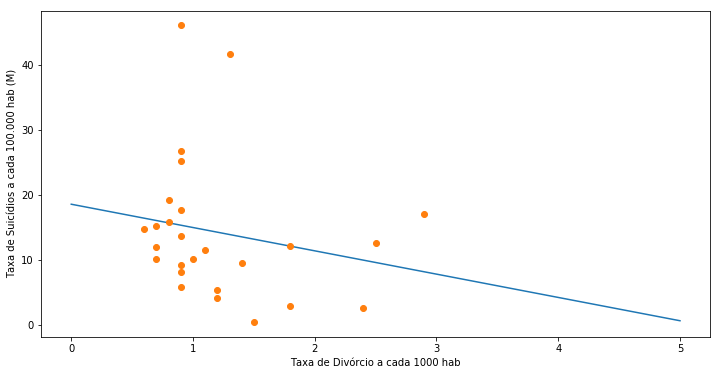

In [0]:
#Relacionando a Taxa de Divórcios com a Taxa de Suicídios (M)

a1,b1 = coeficientes(latinamerica['Divorce Rate'],latinamerica['Male Suicides'])
dds = np.linspace(0,5,10)

y1 = a1 + b1*dds

plot.figure(figsize=(12,6))
plot.plot(dds,y1)
plot.plot(latinamerica['Divorce Rate'], latinamerica['Male Suicides'], 'o')
plot.xlabel('Taxa de Divórcio a cada 1000 hab')
plot.ylabel('Taxa de Suicídios a cada 100.000 hab (M)')
plot.show()

In [0]:
#Função que recebe Taxa de Divórcios e prediz Taxa de Suícidios (M)

def SuicideDivorce(divorce_rate):
  return a1+b1*divorce_rate

SuicideDivorce(1).round(2)

14.99

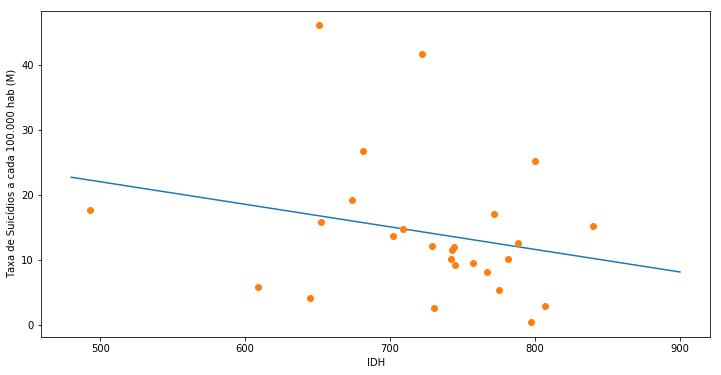

In [0]:
#Relacionando o IDH com a Taxa de Suicídios (M)

a2,b2 = coeficientes(latinamerica['HDI'],latinamerica['Male Suicides'])
ids = np.linspace(480,900,10)

y2 = a2 + b2*ids

plot.figure(figsize=(12,6))
plot.plot(ids,y2)
plot.plot(latinamerica['HDI'], latinamerica['Male Suicides'], 'o')
plot.xlabel('IDH')
plot.ylabel('Taxa de Suicídios a cada 100.000 hab (M)')
plot.show()

In [0]:
#Função que recebe IDH e prediz Taxa de Suícidios (M)

def SuicideIDH(idh):
  return a2+b2*idh

SuicideIDH(400).round(2)

25.48

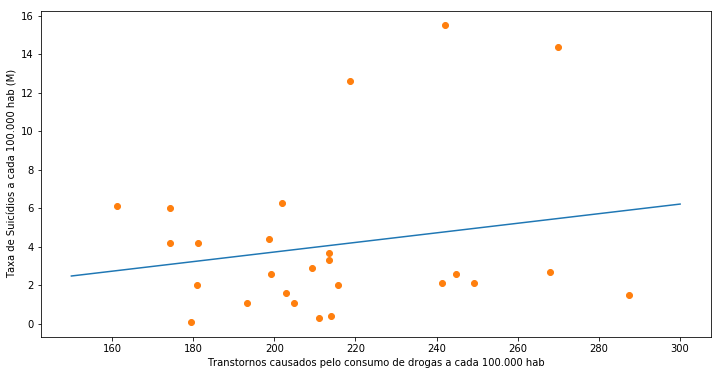

In [0]:
#Relacionando os Transtornos causados pelo consumo de drogas com a Taxa de Suicídios (F)

a3,b3 = coeficientes(latinamerica['Drugs Rate'],latinamerica['Female Suicides'])
dgs = np.linspace(150,300,10)

y3 = a3 + b3*dgs

plot.figure(figsize=(12,6))
plot.plot(dgs,y3)
plot.plot(latinamerica['Drugs Rate'], latinamerica['Female Suicides'], 'o')
plot.xlabel('Transtornos causados pelo consumo de drogas a cada 100.000 hab')
plot.ylabel('Taxa de Suicídios a cada 100.000 hab (M)')
plot.show()

In [0]:
#Função que recebe Taxa de Transtornos causados pelo consumo de drogas e prediz Taxa de Suícidios (F)

def SuicideDrugs(drugs_rate):
  return a3+b3*drugs_rate

SuicideDrugs(300).round(2)

6.22

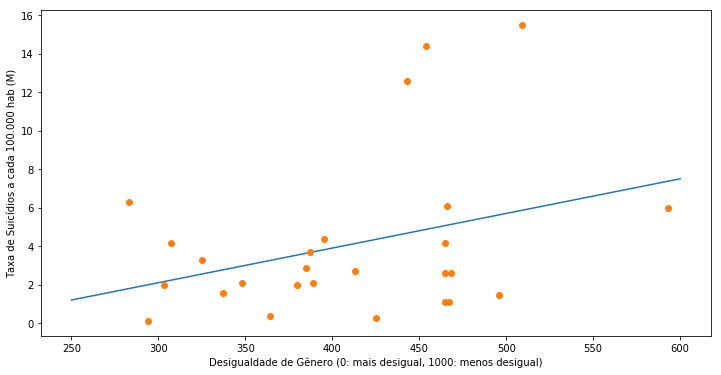

In [0]:
#Relacionando a Desigualdade de Gênero com a Taxa de Suicídios (F)

a4,b4 = coeficientes(latinamerica['Gender Inequality'],latinamerica['Female Suicides'])
gis = np.linspace(250,600,10)

y4 = a4 + b4*gis

plot.figure(figsize=(12,6))
plot.plot(gis,y4)
plot.plot(latinamerica['Gender Inequality'], latinamerica['Female Suicides'], 'o')
plot.xlabel('Desigualdade de Gênero (0: mais desigual, 1000: menos desigual)')
plot.ylabel('Taxa de Suicídios a cada 100.000 hab (M)')
plot.show()

In [0]:
#Função que recebe Taxa de Desigualdade de Gênero e prediz Taxa de Suícidios (F)

def SuicideGenderIneq(gender_ineq):
  return a4+b4*gender_ineq

SuicideGenderIneq(850).round(2)

12.01

### Separando dados, treinando, analisando score e simulando o modelo para Suicídios (M)

In [0]:
#Série para armazenar a Taxa de Suicídios (M)

Ym = latinamerica['Male Suicides']

#DataFrame para as variáveis a relacionar

Xm = latinamerica[['HDI', 'Divorce Rate', 'Income Index', 'Education Index']]

#Separando dataset de treino e teste

Xm_train,Xm_test, Ym_train, Ym_test = train_test_split(Xm,Ym,test_size=0.4, random_state = 42)

In [0]:
#Treinando

modelm = LinearRegression()

modelm.fit(Xm_train, Ym_train)

#Score do treino

modelm.score(Xm_train, Ym_train)

0.33290589675550863

In [0]:
#Efeito Médio na Taxa de Suicídio (M) quando as variáveis são zeradas

modelm.intercept_.round(2)

93.43

In [0]:
#Analisando os Coeficientes de Regressão

modelm.coef_.round(2)

array([-0.36,  2.41,  0.15,  0.11])

In [0]:
#Gerando previsão do modelo

ym_previsto = modelm.predict(Xm_test)

In [0]:
metrics.r2_score(Ym_test,ym_previsto)

-0.04967047361543364

### Separando dados, treinando, analisando score e simulando o modelo para Suicídios (F)

In [0]:
#Série para armazenar a Taxa de Suicídios (F)

Yf = latinamerica['Female Suicides']

#DataFrame para as variáveis a relacionar

Xf = latinamerica[['HDI', 'Gender Inequality', 'Divorce Rate', 'Income Index', 'Education Index']]

#Separando dataset de treino e teste

Xf_train,Xf_test, Yf_train, Yf_test = train_test_split(Xf,Yf,test_size=0.4, random_state = 42)

In [0]:
#Treinando

modelf = LinearRegression()

modelf.fit(Xf_train, Yf_train)

#Score do treino

modelf.score(Xf_train, Yf_train)

0.3753645269803124

In [0]:
#Efeito Médio na Taxa de Suicídio (M) quando as variáveis são zeradas

modelf.intercept_.round(2)

37.25

In [0]:
#Analisando os Coeficientes de Regressão

modelf.coef_.round(2)

array([-0.16,  0.  ,  0.39,  0.06,  0.06])

In [0]:
#Gerando previsão e score do modelo

yf_previsto = modelf.predict(Xf_test)
metrics.r2_score(Yf_test,yf_previsto)

0.2016130708523488